In [28]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from surprise import *
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from collections import defaultdict

In [29]:


# import dataset
data = pd.read_csv("data/up-selling/bb/bb_user_ratings.csv")
try:
    data.drop(["Unnamed: 0"],axis=1,inplace=True)
except:
    pass
data_pca = data[["ACCOUNT_NUM.hash","package","pca_ratings"]].rename(columns={"pca_ratings":"ratings"})
data_pca.dropna(subset=["ratings"],inplace=True)
data = data[["ACCOUNT_NUM.hash","package","ratings"]]

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67030 entries, 0 to 67029
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  67030 non-null  object 
 1   package           67030 non-null  object 
 2   ratings           67030 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.5+ MB


In [31]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25724 entries, 0 to 25723
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  25724 non-null  object 
 1   package           25724 non-null  object 
 2   ratings           25724 non-null  float64
dtypes: float64(1), object(2)
memory usage: 803.9+ KB


## Interaction Matrix

In [32]:
# create a histogram of all the interactions by all the users present in the dataset
def create_interaction_matrix(data):
    interactions = data.groupby('ACCOUNT_NUM.hash').count()['package']
    plt.hist(interactions,bins=20)
    plt.show()

    # create the user item matrix using the ratings dataset - Hint: try using pivot function 
    interactions_metrix = data.pivot_table(index="ACCOUNT_NUM.hash", columns="package", values="ratings",aggfunc=np.sum)
    # replace all the missing values with zero
    return interactions_metrix.fillna(0)

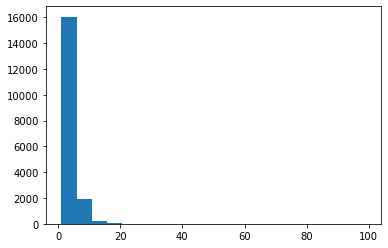

package,ANY BEAT,ANY BLAZE,ANY FLIX,ANY JOY,ANY SPIKE,ANY STORM,ANY TIDE,BROADBAND EXPERIENCE,FTTH_ANY BLAZE,FTTH_ANY DELIGHT,...,WEB CHAMP,WEB FAMILY ACTIVE,WEB FAMILY PLUS,WEB FAMILY XTRA,WEB LITE,WEB MASTER,WEB PAL,WEB PRO,WEB STARTER,XCITE
ACCOUNT_NUM.hash,,,,,,,,,,,,,,,,,,,,,
000eee57a6c7a02c8aca8b410ea2e287,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6875,0.0
000f325a72b9d24742237070939b57d1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9375,0.0
00103d1ae201c2ddb33b965f44f280b1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
0011c1b02e2403c74c75ae8b5582e018,0.0,0.0,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0000,0.0
0012377a9a647a0119ba84158127ae8f,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe2bae6a0c7c4b20dec84f505cec1b3,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
ffec2210afd448ef3cf76f20d6dc1814,0.0,0.0,0.0,1.125,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
ffee4f0542d8f581b56b6b3dc7e2c178,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0


In [33]:
create_interaction_matrix(data)

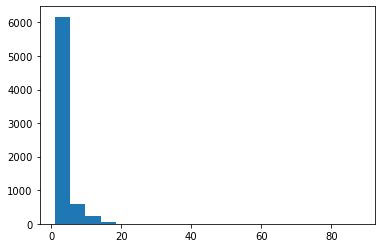

package,ANY BEAT,ANY BLAZE,ANY FLIX,ANY JOY,ANY SPIKE,ANY STORM,ANY TIDE,BROADBAND EXPERIENCE,FTTH_ANY BLAZE,FTTH_ANY DELIGHT,...,VDSL_WEB FAMILY PLUS,WEB BOOSTER,WEB FAMILY ACTIVE,WEB FAMILY PLUS,WEB FAMILY XTRA,WEB LITE,WEB PAL,WEB PRO,WEB STARTER,XCITE
ACCOUNT_NUM.hash,,,,,,,,,,,,,,,,,,,,,
000f325a72b9d24742237070939b57d1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.832006,0.0
0013519e648e9718c56e1e6ccfb3b17d,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.574361,0.0,0.000000,0.0
001461eda095f55eb35ea34116af1598,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
0017b4bec0c82391b1f8692cc2ed9777,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
0024a31050a006edc3f0466dc5396f16,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe2bae6a0c7c4b20dec84f505cec1b3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
ffec2210afd448ef3cf76f20d6dc1814,0.0,0.0,0.0,2.192533,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
ffee4f0542d8f581b56b6b3dc7e2c178,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [34]:
create_interaction_matrix(data_pca)

## Function Definition

In [35]:
def train_test_splitter(data):
    reader = Reader(rating_scale=(0, 1))
    data_model = Dataset.load_from_df(data, reader)
    return data_model,train_test_split(data_model, test_size=.20)

In [36]:
def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0


In [37]:
def get_top_n(predictions, n=10):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est, true_r))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:5]
        

    return top_n

In [38]:
# calculate NDCG
def ndcg(y_true, y_pred, k=None, powered=False):
    def dcg(scores, k=None, powered=False):
        if k is None:
            k = scores.shape[0]
        if not powered:
            ret = scores[0]
            for i in range(1, k):
                ret += scores[i] / np.log2(i + 1)
            return ret
        else:
            ret = 0
            for i in range(k):
                ret += (2 ** scores[i] - 1) / np.log2(i + 2)
            return ret
    
    ideal_sorted_scores = np.sort(y_true)[::-1]
    ideal_dcg_score = dcg(ideal_sorted_scores, k=k, powered=powered)
    
    pred_sorted_ind = np.argsort(y_pred)[::-1]
    pred_sorted_scores = y_true[pred_sorted_ind]
    dcg_score = dcg(pred_sorted_scores, k=k, powered=powered)
    
    return dcg_score / ideal_dcg_score

def ndcg1(y_true, y_pred, k=None):
    return ndcg(y_true, y_pred, k=k, powered=False)

def ndcg2(y_true, y_pred, k=None):
    return ndcg(y_true, y_pred, k=k, powered=True)

In [39]:
def top_n_pred(predictions):
    top_n = get_top_n(predictions, n=3)
    #print(top_n)
    users_est = defaultdict(list)
    users_true=defaultdict(list)
    rec_for_user=defaultdict(list)
    for uid, user_ratings in top_n.items():
        users_est[uid].append([est for (_, est,_) in user_ratings])
        users_true[uid].append([true_r for (_,_,true_r) in user_ratings])
        rec_for_user[uid].append([iid for (iid,_,_) in user_ratings])
    return top_n, users_est, users_true, rec_for_user

In [40]:
def calc_ndcg(users_true,users_est):
    ndcg_list=[]
    for uid in top_n:
        
        for i in users_true[uid]:
            y_true=np.asarray(i)#.reshape(-1,1)
        for i in users_est[uid]:
            y_pred=np.asarray(i)#.reshape(-1,1)
        
            ndcg_list.append(ndcg1(y_true, y_pred, k=None))

    ndcg_list = [i for i in ndcg_list if str(i) != 'nan']
    ndgc_rate = np.mean(ndcg_list)
    return ndcg_list, ndgc_rate

## Colbarative Recommenders with Suprise

In [41]:
data_model, (trainset, testset) = train_test_splitter(data)
data_model_pca, (trainset_pca, testset_pca) = train_test_splitter(data_pca)

### SVD recommender

In [42]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
svd_validate = cross_validate(algo, data_model_pca, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2948  0.2928  0.2912  0.2907  0.2902  0.2919  0.0017  
MAE (testset)     0.2536  0.2503  0.2499  0.2497  0.2485  0.2504  0.0017  
Fit time          1.15    1.16    1.09    1.09    1.12    1.12    0.03    
Test time         0.03    0.03    0.03    0.03    0.04    0.03    0.00    


In [43]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset_pca)
predictions = algo.test(testset_pca)

In [44]:
top_n, users_est, users_true, rec_for_user = top_n_pred(predictions)

In [45]:
ndcg_list, ndgc_rate = calc_ndcg(users_true,users_est)
print("NDCG", ndgc_rate)

NDCG 0.992471390058543


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


In [46]:
# Let's build a pandas dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [47]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
3685,d512f57ffadb98e3c2388e4948f4360d,ANY BEAT,0.243949,0.243797,{'was_impossible': False},10,1430,0.000152
3076,42710d79a4ad1d0c7026118b32f83bdc,WEB STARTER,0.416092,0.415860,{'was_impossible': False},4,5509,0.000233
4550,42710d79a4ad1d0c7026118b32f83bdc,WEB STARTER,0.416092,0.415860,{'was_impossible': False},4,5509,0.000233
2047,745a15c9026ce1dbcab0e0cfcdd3992f,FTTH_WEB FAMILY PLUS,0.405054,0.404348,{'was_impossible': False},3,5424,0.000706
747,4ab83508e2420a7637dce3b8e8eead70,WEB PAL,0.401760,0.401029,{'was_impossible': False},8,4936,0.000731
2997,7e73d23f6e09eb517ba9ef106fbf6847,LTE_WEB STARTER,0.381683,0.380948,{'was_impossible': False},3,2057,0.000735
963,f97bd943bf8a8542eb7e593ec8163a25,WEB LITE,0.396376,0.395595,{'was_impossible': False},3,9509,0.000781
1941,7d9877ec0b4c4f82a3465cfc62fc9cef,WEB STARTER,0.379434,0.378454,{'was_impossible': False},4,5509,0.000980
4570,07efbac16754d0c8f54fc273a96ae050,WEB BOOSTER,0.390375,0.389349,{'was_impossible': False},4,113,0.001026
3876,810680fd7613ae53f6c9c5791e74fe01,WEB FAMILY PLUS,0.398991,0.400026,{'was_impossible': False},3,6261,0.001034


In [48]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.2920
RMSE --> 0.2919713242676592
Accuracy --> 0.7080286757323409


### SlopeOne recommender

In [49]:
# We'll use the SlopeOne algorithm.
algo = SlopeOne()

# Run 5-fold cross-validation and print results
so_validate =cross_validate(algo, data_model_pca, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3086  0.3116  0.3135  0.3139  0.3150  0.3125  0.0023  
MAE (testset)     0.2272  0.2288  0.2309  0.2315  0.2338  0.2305  0.0023  
Fit time          0.07    0.07    0.08    0.07    0.08    0.07    0.00    
Test time         0.04    0.04    0.04    0.05    0.05    0.04    0.00    


In [51]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset_pca)
predictions = algo.test(testset_pca)

In [52]:
top_n, users_est, users_true, rec_for_user = top_n_pred(predictions)

In [53]:
ndcg_list, ndgc_rate = calc_ndcg(users_true,users_est)
print("NDCG", ndgc_rate)

NDCG 0.992974934875528


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


In [54]:
# Let's build a pandas dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [55]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
1783,f109cf815160bdb13e6768ad9e48c63c,FTTH_WEB FAMILY PLUS,0.240541,0.240541,{'was_impossible': False},1,5424,0.0
4005,238098db4ea2047524541a9f1cec4069,FTTH_WEB FAMILY PLUS,0.000000,0.000000,{'was_impossible': False},2,5424,0.0
2548,0b19d5d0da8280f8cf2f3d134be0be69,WEB FAMILY XTRA,0.429973,0.429973,{'was_impossible': False},2,787,0.0
4781,b32581dfc96a4fc4e5c9cb5ee8fe3c8c,WEB LITE,0.240541,0.240541,{'was_impossible': False},2,9509,0.0
2536,2100493c265612156cf1105a70a8c063,FTTH_WEB FAMILY PLUS,0.000000,0.000000,{'was_impossible': False},2,5424,0.0
865,169b8710cacab37662c3f9fd742be1ef,ANY JOY,0.000000,0.000000,{'was_impossible': False},3,2874,0.0
4780,9113fc799bd99da34a37377c099abef9,WEB STARTER,0.404763,0.404763,{'was_impossible': False},2,5509,0.0
4779,83342ee42e5ad11d6f2e2af2481dfd3f,WEB LITE,0.770264,0.770264,{'was_impossible': False},5,9509,0.0
2534,5b64342cf3ff3eb8e36df3417a1ebaba,FTTH_ANY FLIX,0.000000,0.000000,{'was_impossible': False},2,371,0.0
869,1fe9ea7dd0bd659b8c61a4b450a7c35c,WEB FAMILY XTRA,0.000000,0.000000,{'was_impossible': False},1,787,0.0


In [56]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.3137
RMSE --> 0.31374572769514836
Accuracy --> 0.6862542723048517


### KNN with Means recommender

In [57]:
# We'll use the SlopeOne algorithm.
algo = KNNWithMeans()

# Run 5-fold cross-validation and print results
knn_validate = cross_validate(algo, data_model_pca, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3166  0.3144  0.3167  0.3140  0.3147  0.3153  0.0012  
MAE (testset)     0.2329  0.2319  0.2350  0.2323  0.2315  0.2327  0.0012  
Fit time          2.26    2.23    2.21    2.08    2.22    2.20    0.06    
Test time         5.31    5.16    5.04    5.03    4.85    5.08    0.15    


In [58]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset_pca)
predictions = algo.test(testset_pca)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [59]:
top_n, users_est, users_true, rec_for_user = top_n_pred(predictions)

In [60]:
ndcg_list, ndgc_rate = calc_ndcg(users_true,users_est)
print("NDCG", ndgc_rate)

NDCG 0.9922769171225553


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


In [61]:
# Let's build a pandas dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [62]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
2703,0a376f16c7cc091a1eabe4b4975e6cc2,WEB LITE,0.327213,0.327213,"{'actual_k': 40, 'was_impossible': False}",6,9509,0.0
2799,d315cc6a9145e2b4d3e4bb7483753503,FTTH_WEB FAMILY PLUS,0.000000,0.000000,"{'actual_k': 40, 'was_impossible': False}",2,5424,0.0
3913,1626c1ecf308119a26f375c2c78cf95f,FTTH_WEB FAMILY PLUS,0.000000,0.000000,"{'actual_k': 40, 'was_impossible': False}",2,5424,0.0
3246,de9928fcd6bf78ceb78260f79c114dc3,WEB LITE,0.000000,0.000000,"{'actual_k': 40, 'was_impossible': False}",3,9509,0.0
2050,1243736cf10566c1c9bfcd172ba734e9,WEB FAMILY PLUS,0.292349,0.292349,"{'actual_k': 40, 'was_impossible': False}",3,6261,0.0
1739,31b65777fbac69bb340a7678bf69c571,WEB LITE,0.000000,0.000000,"{'actual_k': 40, 'was_impossible': False}",2,9509,0.0
1738,55e2a2dee3378023c2b15d33b9207d71,WEB FAMILY PLUS,0.240541,0.240541,"{'actual_k': 40, 'was_impossible': False}",3,6261,0.0
5044,1df5f17ad1e51051a510314a9bbb55ff,WEB FAMILY PLUS,0.243952,0.243952,"{'actual_k': 40, 'was_impossible': False}",1,6261,0.0
1155,692a1d96bd23a4412c9fcef671dc3939,WEB PAL,0.000000,0.000000,"{'actual_k': 40, 'was_impossible': False}",2,4936,0.0
2793,1eea486ec2ea7d5d0714a8572feb4f52,WEB PAL,0.000000,0.000000,"{'actual_k': 40, 'was_impossible': False}",2,4936,0.0


In [63]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.3164
RMSE --> 0.31644063224998015
Accuracy --> 0.6835593677500198


### Benchmark algorithms

In [64]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SlopeOne(), KNNBaseline(), KNNWithMeans(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_model_pca, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
val_df = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
val_df

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


## CF Recommenders Accuracy Plots

In [ ]:
svd_validate["test_rmse"]

In [ ]:
fig,ax = plt.subplots(figsize=(13,8))
ax.plot(so_validate["test_rmse"], color='blue')
ax.plot(svd_validate["test_rmse"], color='green')
ax.plot(knn_validate["test_rmse"], color='orange')
ax.plot([0.257,0.254,0.252,0.244,0.241],linewidth=3, color='red')
ax.plot(so_validate["test_mae"], linestyle='dashdot', color='blue')
ax.plot(svd_validate["test_mae"], linestyle='dashdot', color='green')
ax.plot(knn_validate["test_mae"], linestyle='dashdot', color='orange')
ax.plot([0.223,0.211,0.207,0.201,0.199],linewidth=4, linestyle='dashdot', color='red')
# plt.xticks(np.arange(0, 30, 0.5))
plt.title("Boradband Packages Recommender", loc="center")
plt.legend(["RMSE: SlopeOne","RMSE: SVD","RMSE: KNNwithMeans","RMSE: Wide Model",
           "MAE: SlopeOne","MAE: SVD","MAE: KNNwithMeans","MAE: Wide Model"])

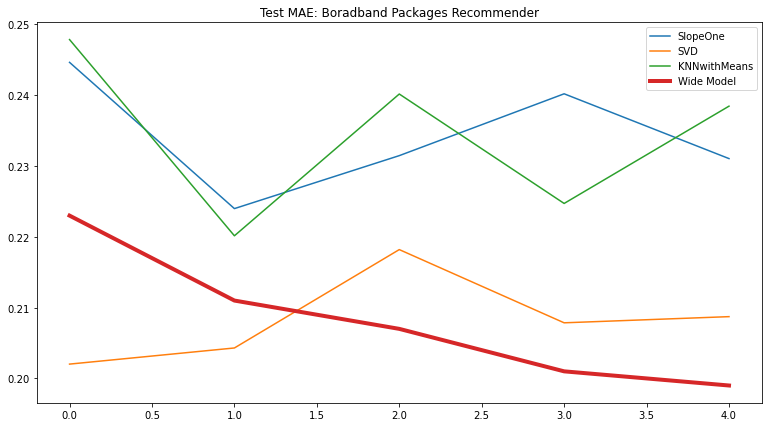

In [202]:
fig,ax = plt.subplots(figsize=(13,7))
ax.plot(so_validate["test_mae"])
ax.plot(svd_validate["test_mae"])
ax.plot(knn_validate["test_mae"])
ax.plot([0.223,0.211,0.207,0.201,0.199],linewidth=4)
# plt.xticks(np.arange(0, 4, 0.2))
plt.title("Test MAE: Boradband Packages Recommender", loc="center")
plt.legend(["SlopeOne","SVD","KNNwithMeans","Wide Model"])